In [1]:
import pandas as pd
import numpy as np

In [9]:
# load the data 
data = pd.read_csv('D:\Projects\Clustering\\2D cluster\data\data.csv')

In [11]:
data.describe()

,x,y,color
count,336.000000,336.000000,336.000000
mean,577.105010,349.011462,0.952381
std,78.967344,68.225253,0.816322
min,416.820261,201.328804,0.000000
25%,502.775744,288.342589,0.000000
50%,605.392287,368.069573,1.000000
75%,639.534882,400.954368,2.000000
max,698.541083,472.039304,2.000000


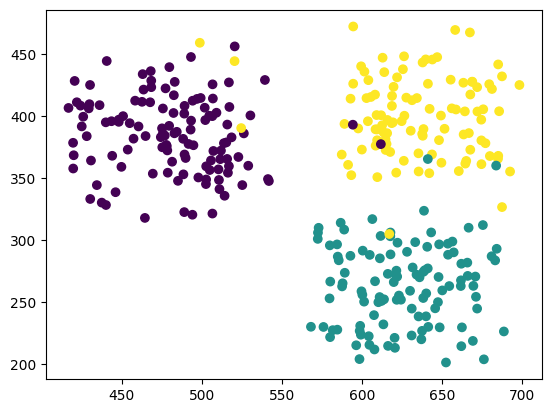

In [13]:
# plot the data with color code based on the color column
import matplotlib.pyplot as plt
plt.scatter(data['x'], data['y'], c=data['color'])
plt.show()

In [16]:
# Let's build a pipeline to do the clustering
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# build the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=3))
])

# fit the pipeline to data
X = data[['x', 'y']]
pipeline.fit(X)

# predict the cluster for each data point
data['cluster'] = pipeline.predict(X)

d:\Projects\Clustering\.conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [27]:
# Create a table with the color values as rows and the cluster as columns
# The values in the table will be the number of data points in each cluster
color_cluster = data.groupby(['color', 'cluster']).size().unstack()
print(color_cluster)

# set mappings to the max value in each column
mappings = color_cluster.apply(np.nanargmax, axis=0)
map_dict = mappings.to_dict()


cluster      0     1      2
color                      
0        118.0   2.0    NaN
1          NaN   2.0  110.0
2          3.0  99.0    2.0


In [29]:
data['cluster'] = data['cluster'].map(map_dict)

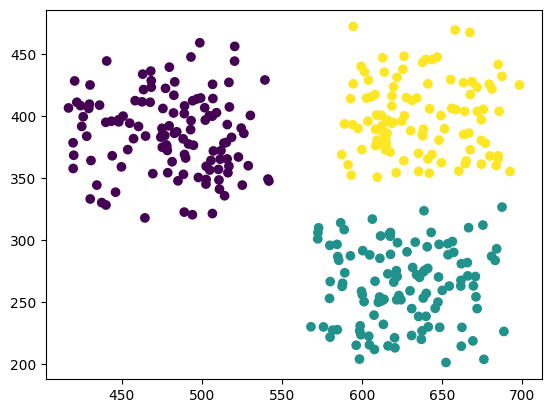

In [42]:
# plot data, and color code the value red if color and cluster don't match
plt.scatter(data['x'], data['y'], c=data['cluster'])

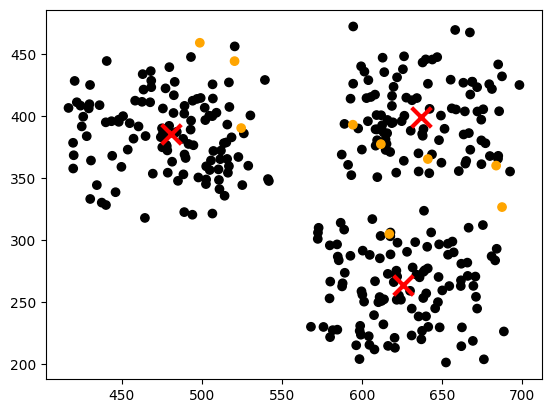

In [41]:
# plot the centroids
centroids = pipeline.named_steps['kmeans'].cluster_centers_
# apply reverse scaling to the centroids
centroids = pipeline.named_steps['scaler'].inverse_transform(centroids)
plt.scatter(data['x'], data['y'], c=np.where(data['color'] == data['cluster'], 'black', 'orange'))
plt.scatter(centroids[:,0], centroids[:,1], marker='x', s=200, linewidths=3, c='r')

plt.show()